# 23.6 Homework- Machine Learning I

Complete the One Rule Algorithm

The algorithm is the following.

1, For each predictor,
1.1 For each value of that predictor, make a rule as follows;
- 1.1.1 Count how often each value of target (class) appears
- 1.1.2 Find the most frequent class
- 1.1.3 Make the rule assign that class to this value of the predictor
1.2 Calculate the total error of the rules of each predictor
2, Choose the predictor with the smallest total error.

In [63]:
import numpy as np
from sklearn.datasets import load_iris
dataset = load_iris() #import data set 
X = dataset.data #label which one is the data and the target
Y = dataset.target
#print(X)
#print(Y)

In [64]:
from collections import OrderedDict
import pandas as pd

Iris_data = OrderedDict({'Sepal Length ': X[:,0], #organize data into a table 
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)

In [65]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [66]:
'''Transform X data into discrete numbers by 
taking the mean of each column and assigning all
all numbers above the mean as 1, below as 0'''

X= np.array(X>X.mean(), dtype='int') 
#print(X)

In [67]:
Iris_data = OrderedDict({'Sepal Length': X[:,0],
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)
#print(df)

In [68]:
''' Find the frequency of each event'''


SLFreq= df.groupby('Label')['Sepal Length']. value_counts()
print (SLFreq)

SWFreq= df.groupby('Label')['Sepal Width']. value_counts()
print (SWFreq)

PLFreq= df.groupby('Label')['Petal Length']. value_counts()
print (PLFreq)

PWFreq= df.groupby('Label')['Petal Width']. value_counts()
print (PWFreq)

Label  Sepal Length
0      1               50
1      1               50
2      1               50
Name: Sepal Length, dtype: int64
Label  Sepal Width
0      0              28
       1              22
1      0              50
2      0              47
       1               3
Name: Sepal Width, dtype: int64
Label  Petal Length
0      0               50
1      1               47
       0                3
2      1               50
Name: Petal Length, dtype: int64
Label  Petal Width
0      0              50
1      0              50
2      0              50
Name: Petal Width, dtype: int64


In [71]:
'''Rules:'''

SLcount= 0
for i in X[:,0]:
    if i==1:
        SLcount +=1

SWcount= 0
for j in X[:,2]:
    if j==0:
        SWcount +=1
    
PLcount1= 0
for k in X[:,2]:
    if k==0:
        PLcount1 +=1
    
PLcount2= 0
for l in X[:,2]:
    if l==1:
        PLcount2 +=1

PWcount= 0
for m in X[:,3]:
    if m==0:
        PWcount+=1

In [74]:
'''Calculate percentage error of each rule. The total error 
calculated is the measure of each predictor contribution.'''

SLerror= (SLFreq[1,1]+SLFreq[2,1])/len(X)
SWerror= (SWFreq[0,0]+SWFreq[2,0])/len(X)
#print (SLerror)
#print (SWerror)

PLerror1= (PLFreq[1,0])/len(X)
PLerror2= (PLFreq[1,1])/len(X)
#print (PLerror1)
#print (PLerror2)

PWerror= (PWFreq[0]+PWFreq[1])/len(X)
#print(PWerror)

In [75]:
print('Sepal Length Count:', SLcount)
print('Percentage Error of Predictor:', SLerror*100, '%')
print('\n')

print('Sepal Width Count:', SWcount)
print('Percentage Error of Predictor:', SWerror*100, '%')
print('\n')

print('Petal Length Count (label 1):', PLcount1)
print('Percentage Error of Predictor:', PLerror1*100, '%')
print('\n')

print('Petal Length Count(label 2):', PLcount2)
print('Percentage Error of Predictor:', PLerror2*100, '%')
print('\n')

print('Petal Width Count:', SLcount)
print('Percentage Error of Predictor:', PWerror*100, '%')
print('\n')

Sepal Length Count: 150
Percentage Error of Predictor: 66.66666666666666 %


Sepal Width Count: 53
Percentage Error of Predictor: 50.0 %


Petal Length Count (label 1): 53
Percentage Error of Predictor: 2.0 %


Petal Length Count(label 2): 97
Percentage Error of Predictor: 31.333333333333336 %


Petal Width Count: 150
Percentage Error of Predictor: Petal Width
0    66.666667
Name: Petal Width, dtype: float64 %




# 22.5 Homework- Machine Learning II

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#load dataset
wine= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', delimiter=',')
wine= np.array(wine)
#wine

X= wine[:,1:14] #data
Y= wine[:,0] #target
#print(X)
#print(Y)


#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y)
#len(X_train)
#len(X_test)

In [2]:
''' Use KNeighborClassifier as an estimator.
    Change parameters to compare which has the best accuracy'''

estimator= KNeighborsClassifier() #default
estimator2= KNeighborsClassifier(1) #change the number of neighbors
estimator3=KNeighborsClassifier(2, 'distance', 'kd_tree', 300, p=1) 
#‘distance’ : weight points by the inverse of their distance. 
#in this case, closer neighbors of a query point will have a 
#greater influence than neighbors which are further away
#Change the algorithm to compute the nearest neighbors to 'kd_tree'

estimator.fit(X_train, y_train)
estimator2.fit(X_train, y_train)
estimator3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=300, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='distance')

In [3]:
#test the accuracy of each estimator
y_predicted= estimator.predict(X_test)
y_predicted2= estimator2.predict(X_test)
y_predicted3= estimator3.predict(X_test)

accuracy= np.mean(y_test== y_predicted)*100
accuracy2= np.mean(y_test== y_predicted2)*100
accuracy3= np.mean(y_test== y_predicted3)*100


print('1. KNeighborsClassifier() accuracy is:', accuracy, '%')
print('2. KNeighborsClassifier(1) accuracy is:', accuracy2, '%')
print('3. KNeighborsClassifier(2, distance, kd_tree, 300, p=1) accuracy is:', accuracy3, '%')

1. KNeighborsClassifier() accuracy is: 62.22222222222222 %
2. KNeighborsClassifier(1) accuracy is: 66.66666666666666 %
3. KNeighborsClassifier(2, distance, kd_tree, 300, p=1) accuracy is: 82.22222222222221 %


Looking at the results above, the third estimator, in which we have changed the parameters, has the highest accuracy. 

In [12]:
import warnings
warnings.filterwarnings('ignore')

#check effect of small deviations of the neighbor distance on accuracy 
avg_scores= []
all_scores=[]
avg_scores2= []
all_scores2=[]
avg_scores3= []
all_scores3=[]

parameters= list(range(1,20))
for n_neighbors in parameters:
    estimator= KNeighborsClassifier(n_neighbors=n_neighbors)
    scores= cross_val_score(estimator, X,Y, scoring= 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)
    
for n_neighbors in parameters:
    estimator= KNeighborsClassifier(n_neighbors=n_neighbors)
    scores= cross_val_score(estimator2, X,Y, scoring= 'accuracy')
    avg_scores2.append(np.mean(scores))
    all_scores2.append(scores)
    
for n_neighbors in parameters:
    estimator= KNeighborsClassifier(n_neighbors=n_neighbors)
    scores= cross_val_score(estimator3, X,Y, scoring= 'accuracy')
    avg_scores3.append(np.mean(scores))
    all_scores3.append(scores)

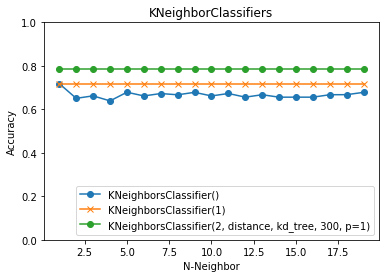

In [13]:
#plot data 
plt.plot(parameters, avg_scores, '-o', label='KNeighborsClassifier()' )
plt.plot(parameters, avg_scores2, '-x', label= 'KNeighborsClassifier(1)')
plt.plot(parameters, avg_scores3, '-o', label= 'KNeighborsClassifier(2, distance, kd_tree, 300, p=1)')
plt.xlabel('N-Neighbor')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc="lower right")
plt.title("KNeighborClassifiers")
plt.show()

## Trying other classifiers!

#### 1. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

estimator= RandomForestClassifier(n_estimators=200)
estimator.fit(X_train, y_train)
y_predicted= estimator.predict(X_test)
accuracy= np.mean(y_test== y_predicted)*100
print('Accuracy is:', accuracy, '%')

Accuracy is: 95.55555555555556 %


#### 2. Support Vector Classifier (SVC)

In [20]:
from sklearn.svm import SVC

estimator= SVC()
estimator.fit(X_train, y_train)
y_predicted= estimator.predict(X_test)
accuracy= np.mean(y_test== y_predicted)*100
print('Accuracy is:' ,accuracy, '%')

Accuracy is: 37.77777777777778 %
